In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action = 'ignore', category = UserWarning)

In [2]:
# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Преобразование меток в категориальный формат
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Создание модели №1
model_1 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# Компиляция модели
model_1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Определение обратного вызова EarlyStopping
early_stopping_1 = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

# Обучение модели
history_1 = model_1.fit(
    x_train, y_train,
    epochs = 10,
    validation_split = 0.2,
    callbacks = [early_stopping_1]
)

# Предсказания
y_pred_1 = model_1.predict(x_test)

# Оценка качества модели
loss, accuracy_1 = model_1.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy_1}')
roc_auc_1 = roc_auc_score(y_test, y_pred_1)
print(f'ROC AUC: {roc_auc_1}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8631 - loss: 0.4828 - val_accuracy: 0.9565 - val_loss: 0.1574
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9584 - loss: 0.1427 - val_accuracy: 0.9656 - val_loss: 0.1172
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9723 - loss: 0.0923 - val_accuracy: 0.9708 - val_loss: 0.0994
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0672 - val_accuracy: 0.9697 - val_loss: 0.1020
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0488 - val_accuracy: 0.9705 - val_loss: 0.0960
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0365 - val_accuracy: 0.9687 - val_loss: 0.1114
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9915 - loss: 0.0293 - val_accuracy: 0.9747 - val_loss: 0.0869
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9930 - loss: 0.0228 - 

In [24]:
# Сохранение модели №1 в файл
model_1.save('mnist_model_1.keras')

In [6]:
# Создание модели №2
model_2 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# Компиляция модели
model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Определение обратного вызова EarlyStopping
early_stopping_2 = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

# Обучение модели
history_2 = model_2.fit(
    x_train, y_train,
    epochs = 10,
    validation_split = 0.2,
    callbacks = [early_stopping_2]
)

# Предсказания
y_pred_2 = model_2.predict(x_test)

# Оценка качества модели
loss, accuracy_2 = model_2.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy_2}')
roc_auc_2 = roc_auc_score(y_test, y_pred_2)
print(f'ROC AUC: {roc_auc_2}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8638 - loss: 0.4728 - val_accuracy: 0.9612 - val_loss: 0.1369
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9664 - loss: 0.1183 - val_accuracy: 0.9696 - val_loss: 0.1079
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9757 - loss: 0.0807 - val_accuracy: 0.9700 - val_loss: 0.1021
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9821 - loss: 0.0578 - val_accuracy: 0.9718 - val_loss: 0.0932
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9865 - loss: 0.0411 - val_accuracy: 0.9735 - val_loss: 0.0932
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9891 - loss: 0.0323 - val_accuracy: 0.9749 - val_loss: 0.0902
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9762 - val_loss: 0.1008
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9932 - loss: 0.0208 - 

In [25]:
# Сохранение модели №2 в файл
model_2.save('mnist_model_2.keras')

In [19]:
# Создание модели №3
model_3 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# Компиляция модели
model_3.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Определение обратного вызова EarlyStopping
early_stopping_3 = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

# Обучение модели
history_3 = model_3.fit(
    x_train, y_train,
    epochs = 10,
    validation_split = 0.2,
    callbacks = [early_stopping_3]
)

# Предсказания
y_pred_3 = model_3.predict(x_test)

# Оценка качества модели
loss, accuracy_3 = model_3.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy_3}')
roc_auc_3 = roc_auc_score(y_test, y_pred_3)
print(f'ROC AUC: {roc_auc_3}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8857 - loss: 0.3960 - val_accuracy: 0.9648 - val_loss: 0.1211
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9701 - loss: 0.0981 - val_accuracy: 0.9661 - val_loss: 0.1070
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9830 - loss: 0.0552 - val_accuracy: 0.9693 - val_loss: 0.1012
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9866 - loss: 0.0416 - val_accuracy: 0.9748 - val_loss: 0.0881
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9724 - val_loss: 0.0993
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9744 - val_loss: 0.0939
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9930 - loss: 0.0199 - val_accuracy: 0.9755 - val_loss: 0.0977
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accu

In [26]:
# Сохранение модели №3 в файл
model_3.save('mnist_model_3.keras')

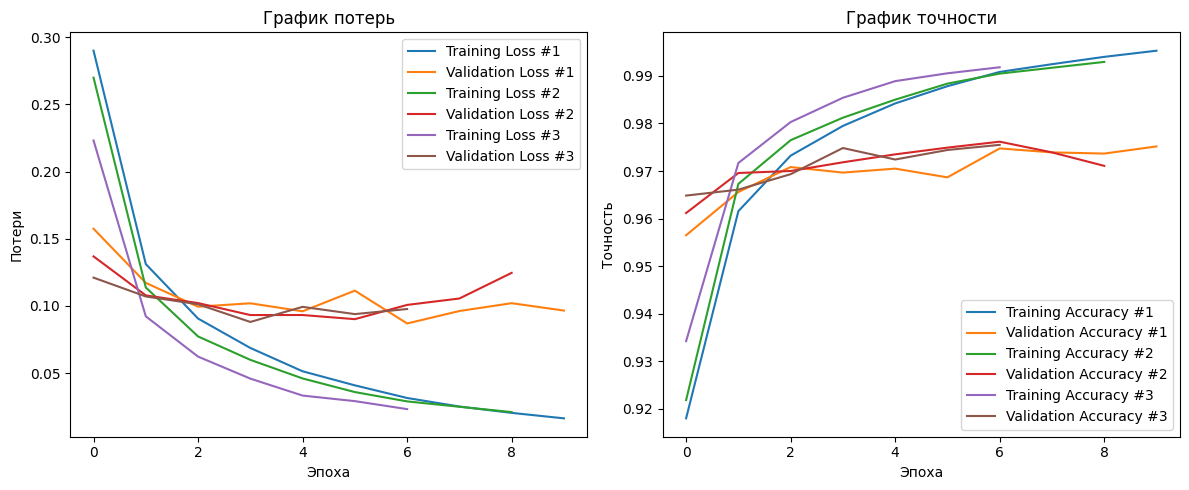

In [23]:
# Графики потерь и точности

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label = 'Training Loss #1')
plt.plot(history_1.history['val_loss'], label = 'Validation Loss #1')
plt.plot(history_2.history['loss'], label = 'Training Loss #2')
plt.plot(history_2.history['val_loss'], label = 'Validation Loss #2')
plt.plot(history_3.history['loss'], label = 'Training Loss #3')
plt.plot(history_3.history['val_loss'], label = 'Validation Loss #3')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc = 'upper right')
plt.title('График потерь')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label = 'Training Accuracy #1')
plt.plot(history_1.history['val_accuracy'], label = 'Validation Accuracy #1')
plt.plot(history_2.history['accuracy'], label = 'Training Accuracy #2')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy #2')
plt.plot(history_3.history['accuracy'], label = 'Training Accuracy #3')
plt.plot(history_3.history['val_accuracy'], label = 'Validation Accuracy #3')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc = 'lower right')
plt.title('График точности')

plt.tight_layout()
plt.show()

In [35]:
print(f'Модель №1: Accuracy - {accuracy_1}, ROC AUC: {roc_auc_1};\nМодель №2: Accuracy - {accuracy_2}, ROC AUC: {roc_auc_2};\nМодель №3: Accuracy - {accuracy_3}, ROC AUC: {roc_auc_3}.')

Модель №1: Accuracy - 0.9763000011444092, ROC AUC: 0.9995600802213291;
Модель №2: Accuracy - 0.9781000018119812, ROC AUC: 0.9995923305878911;
Модель №3: Accuracy - 0.9771000146865845, ROC AUC: 0.9995928756967551.


Модель №2 показала наивысшую точность, а Модель №3 - ROC AUC.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


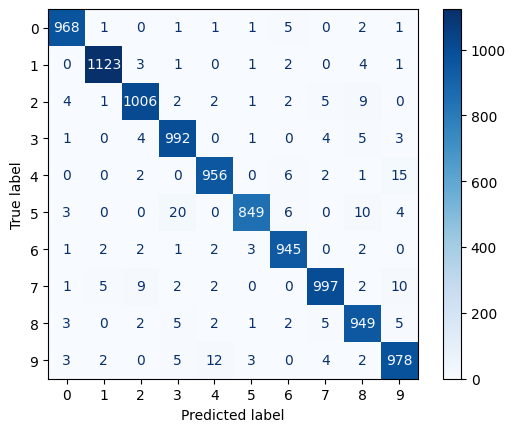

In [40]:
# Загружаем модель из файла
load_model = tf.keras.models.load_model('mnist_model_1.keras')

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Преобразование меток в категориальный формат
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Визуализация матрицы ошибок
y_pred = load_model.predict(x_test)
y_pred_np = np.argmax(y_pred, axis = 1)
y_test_np = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_test_np, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = plt.cm.Blues)

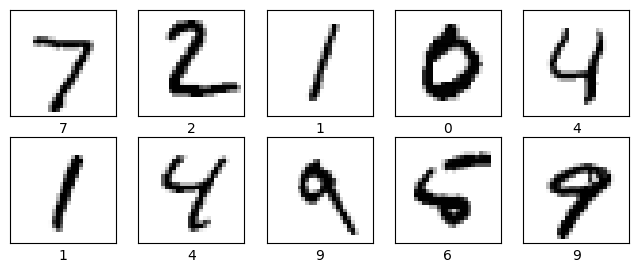

In [43]:
# Визуализация некоторых изображений
plt.figure(figsize = (8, 8))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap = plt.cm.binary)
    plt.xlabel(y_pred[i].argmax())
plt.show()